<a href="https://colab.research.google.com/github/Sunilkumar414674/PRODIGY_DS_03/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
a=pd.read_csv('/content/TASK3.csv')
a

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
#Handle missing values and encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print(a.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in a.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    a[column] = label_encoders[column].fit_transform(a[column])

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
#Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = a.drop('y', axis=1)
y = a['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(32950, 19) (8238, 19)


In [7]:
#Train the decision tree classifier:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.8336974993930566
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.30      0.34      0.32       935

    accuracy                           0.83      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.84      0.83      0.84      8238



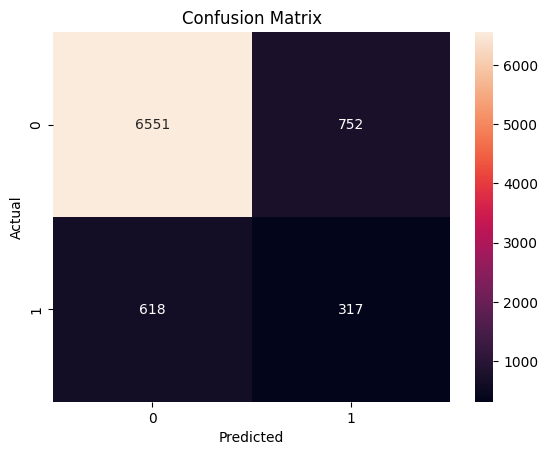

In [8]:
# Evaluate the model's performance on the testing set:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This means that 83.37% of the predictions made by the model are correct.The model performs very well on class 0 but has significant difficulty with class 1.The low precision and recall for class 1 indicate that the model has a high false positive rate and a high false negative rate for this class.The overall accuracy is high, which might be misleading due to the class imbalance.

1.True Positives (TP): The number of instances where the actual class was Yes and the model also predicted Yes. There are 6551 true positives in this case.

2.False Negatives (FN): The number of instances where the actual class was Yes but the model predicted No. In this example, there are 752 false negatives. These are customers who were predicted not to subscribe but actually did.


3.False Positives (FP): The number of instances where the actual class was No but the model predicted Yes. Here, there are 618 false positives. These are customers who were predicted to subscribe but did not.

4.True Negatives (TN): The number of instances where the actual class was No and the model also predicted No. In this case, there are 317 true negatives.






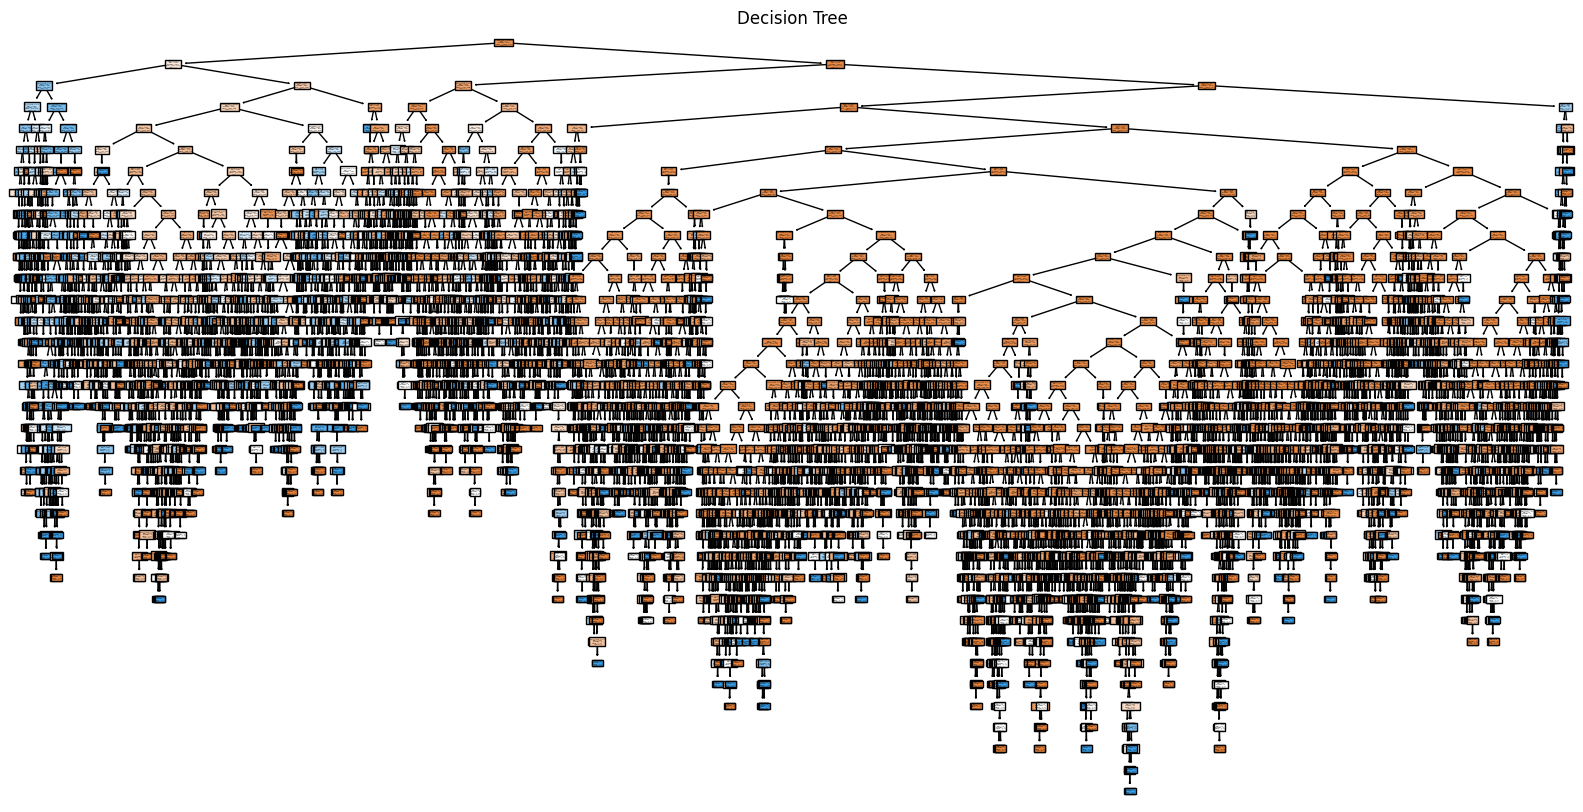

In [12]:
#Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title('Decision Tree')
plt.show()